In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd
from shapely.geometry import Point


In [25]:
data = pd.read_parquet('./DATA/parquet/Hotels.parquet')
data

,sustainability_level,hotel_groupings,name,stars,latitude,longitude,id
0,bronze,338,33 Hotel,3,6.239041,-75.588844,hserdh
1,None,342,4 Sur Hotel,3,6.205673,-75.583824,hskbus
2,silver,340,61Prado Hotel,3,6.258949,-75.563960,sehkh
3,bronze,336,Alcazar de Oviedo by EE Hoteles,3,6.200274,-75.575770,sehbr
4,silver,337,Almaviva Casa Hotel,3,6.251861,-75.586720,suabas
...,...,...,...,...,...,...,...
210,gold,336,Park 10 Hotel,4,6.211838,-75.565384,sehsr
211,silver,336,Royal Living,4,6.213100,-75.570630,hskbua
212,gold,336,Selina Medellin,4,6.207796,-75.564200,suabbh
213,bronze,343,The Morgana Poblado Suites Hotel,4,6.217619,-75.561424,sehhs


In [26]:
# Cargar el archivo CSV
data = pd.read_csv('./DATA/parquet/barrios_y_veredas.csv', encoding='latin1')

# Extraer las coordenadas de la columna 'Shape'
# Convertir la cadena de la forma "(x, y)" a números
data['x'] = data['Shape'].str.extract(r'\(([^,]+),')[0].astype(float)
data['y'] = data['Shape'].str.extract(r', ([^,]+)\)')[0].astype(float)

# Crear una GeoDataFrame con los puntos
gdf_lugares = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data['x'], data['y']), crs="EPSG:3116"  # CRS para Medellín en coordenadas planas
)


In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Cargar los datos de barrios y extraer coordenadas
barrios = pd.read_csv('./DATA/parquet/barrios_y_veredas.csv', encoding='latin1')
barrios['x'] = barrios['Shape'].str.extract(r'\(([^,]+),')[0].astype(float)
barrios['y'] = barrios['Shape'].str.extract(r', ([^,]+)\)')[0].astype(float)

# Crear un GeoDataFrame para los barrios
gdf_barrios = gpd.GeoDataFrame(
    barrios, geometry=gpd.points_from_xy(barrios['x'], barrios['y']), crs="EPSG:4326"  # Usa EPSG:4326 si las coordenadas son lat/long
)

# Cargar los datos de los hoteles y crear un GeoDataFrame
hoteles = pd.read_parquet('./DATA/parquet/Hotels.parquet')
gdf_hoteles = gpd.GeoDataFrame(
    hoteles, geometry=gpd.points_from_xy(hoteles['longitude'], hoteles['latitude']), crs="EPSG:4326"
)

# Realizar la operación de unión espacial para encontrar el barrio más cercano a cada hotel
gdf_hoteles['barrio_cercano'] = gdf_hoteles.geometry.apply(
    lambda x: gdf_barrios.distance(x).idxmin()
)

# Agregar el nombre del barrio correspondiente a cada hotel
gdf_hoteles = gdf_hoteles.merge(
    gdf_barrios[['nombre']], left_on='barrio_cercano', right_index=True, suffixes=('', '_barrio')
)

# Mostrar el resultado
print(gdf_hoteles[['name', 'stars', 'latitude', 'longitude', 'nombre']])


C:\Users\santi\AppData\Local\Temp\ipykernel_27872\2386113776.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lambda x: gdf_barrios.distance(x).idxmin()
C:\Users\santi\AppData\Local\Temp\ipykernel_27872\2386113776.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lambda x: gdf_barrios.distance(x).idxmin()
C:\Users\santi\AppData\Local\Temp\ipykernel_27872\2386113776.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lambda x: gdf_barrios.distance(x).idxmin()
C:\Users\santi\AppData\Local\Temp\ipykernel_27872\2386113776.py:23: UserWarning: Geometry is in a geograph

                                 name  stars  latitude  longitude      nombre
0                            33 Hotel      3  6.239041 -75.588844  La Florida
1                         4 Sur Hotel      3  6.205673 -75.583824  La Florida
2                       61Prado Hotel      3  6.258949 -75.563960  La Florida
3     Alcazar de Oviedo by EE Hoteles      3  6.200274 -75.575770  La Florida
4                 Almaviva Casa Hotel      3  6.251861 -75.586720  La Florida
..                                ...    ...       ...        ...         ...
210                     Park 10 Hotel      4  6.211838 -75.565384  La Florida
211                      Royal Living      4  6.213100 -75.570630  La Florida
212                   Selina Medellin      4  6.207796 -75.564200  La Florida
213  The Morgana Poblado Suites Hotel      4  6.217619 -75.561424  La Florida
214           Medellin Marriott Hotel      5  6.203090 -75.572850  La Florida

[215 rows x 5 columns]


C:\Users\santi\AppData\Local\Temp\ipykernel_27872\2386113776.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lambda x: gdf_barrios.distance(x).idxmin()


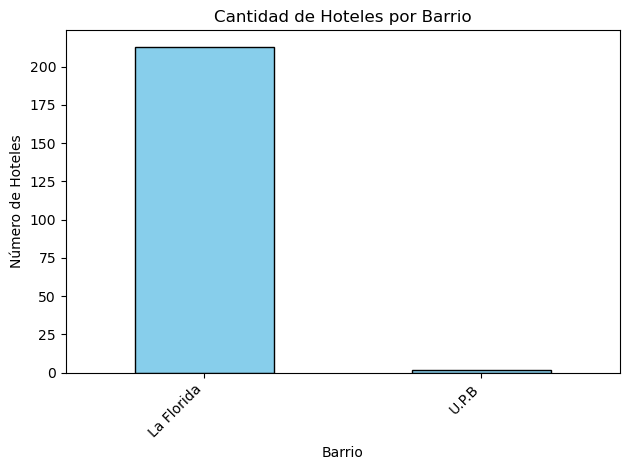

In [28]:
import matplotlib.pyplot as plt

# Contar la cantidad de hoteles por barrio
hoteles_por_barrio = gdf_hoteles['nombre'].value_counts()

# Crear el gráfico de barras
hoteles_por_barrio.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Hoteles por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Número de Hoteles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el layout para que las etiquetas no se corten
plt.show()
